In [43]:
import pickle
import yaml
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator
from pyoperators import MPI         # serve per fare calcolo parallelo

from qubic.lib.MapMaking.FrequencyMapMaking.Qfmm import PipelineFrequencyMapMaking
from qubic.lib.Qsamplings import gal2equ

from qubic.scripts.Scanning_Strategy import Sky_Dips_Sim

## Center right patch

### Only sky

In [28]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/dust_None.pkl", "rb"))

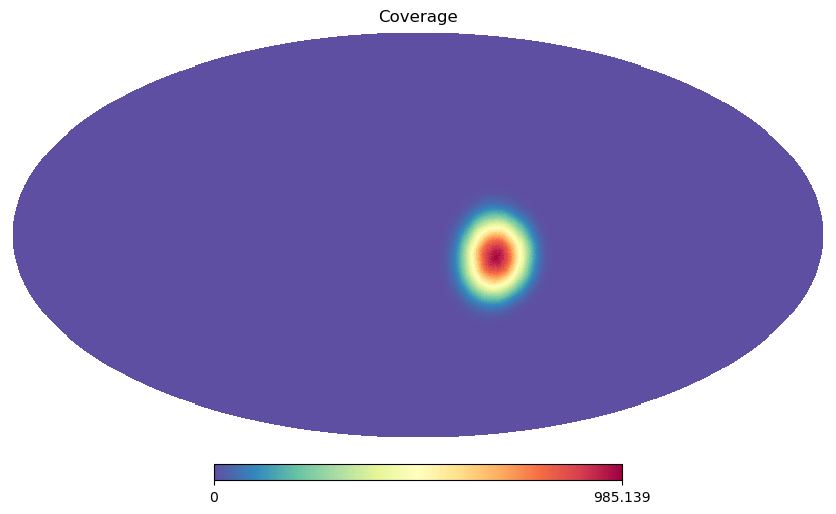

In [29]:
coverage = data['coverage']
hp.mollview(coverage, title='Coverage', cmap='Spectral_r')

In [30]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input_sky = data["maps_in"]
maps_rec_sky = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res_sky = maps_input_sky - maps_rec_sky
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

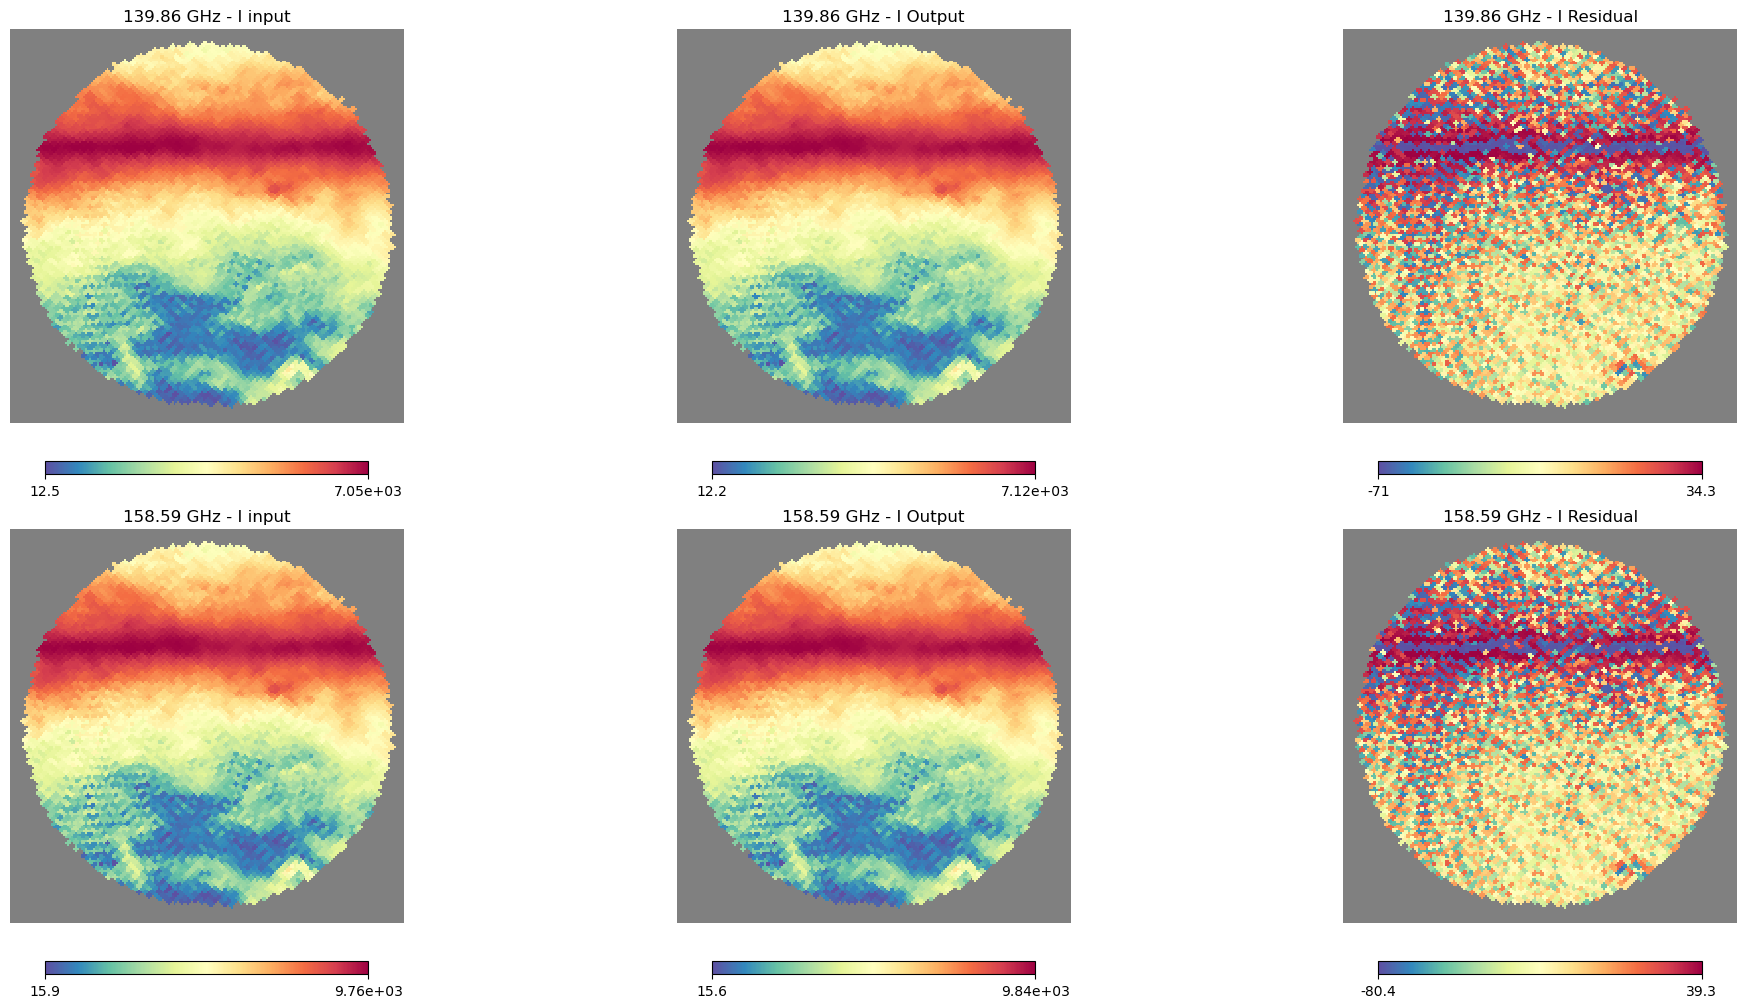

In [31]:
STOKES = ["I", "Q", "U"]

maps_input_sky[:, ~seenpix, :] = hp.UNSEEN
maps_rec_sky[:, ~seenpix, :] = hp.UNSEEN
maps_res_sky[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2
#sigma_input = np.std(maps_input_sky[:, seenpix, istk], axis=0)
#sigma_rec = np.std(maps_rec_sky[:, seenpix, istk], axis=0)
#sigma_res = np.std(maps_rec_sky[:, seenpix, istk] - maps_input_sky[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input_sky[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="Spectral_r",
                        norm="hist",
                        #min = - n * sigma_input[inu],
                        #max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec_sky[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="Spectral_r",
                        norm="hist",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res_sky[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="Spectral_r",
                        norm="hist",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

### Only noise

In [32]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/noise11_None.pkl", "rb"))

In [33]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input_noise = data["maps_in"]
maps_rec_noise = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res_noise = maps_input_noise - maps_rec_noise
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

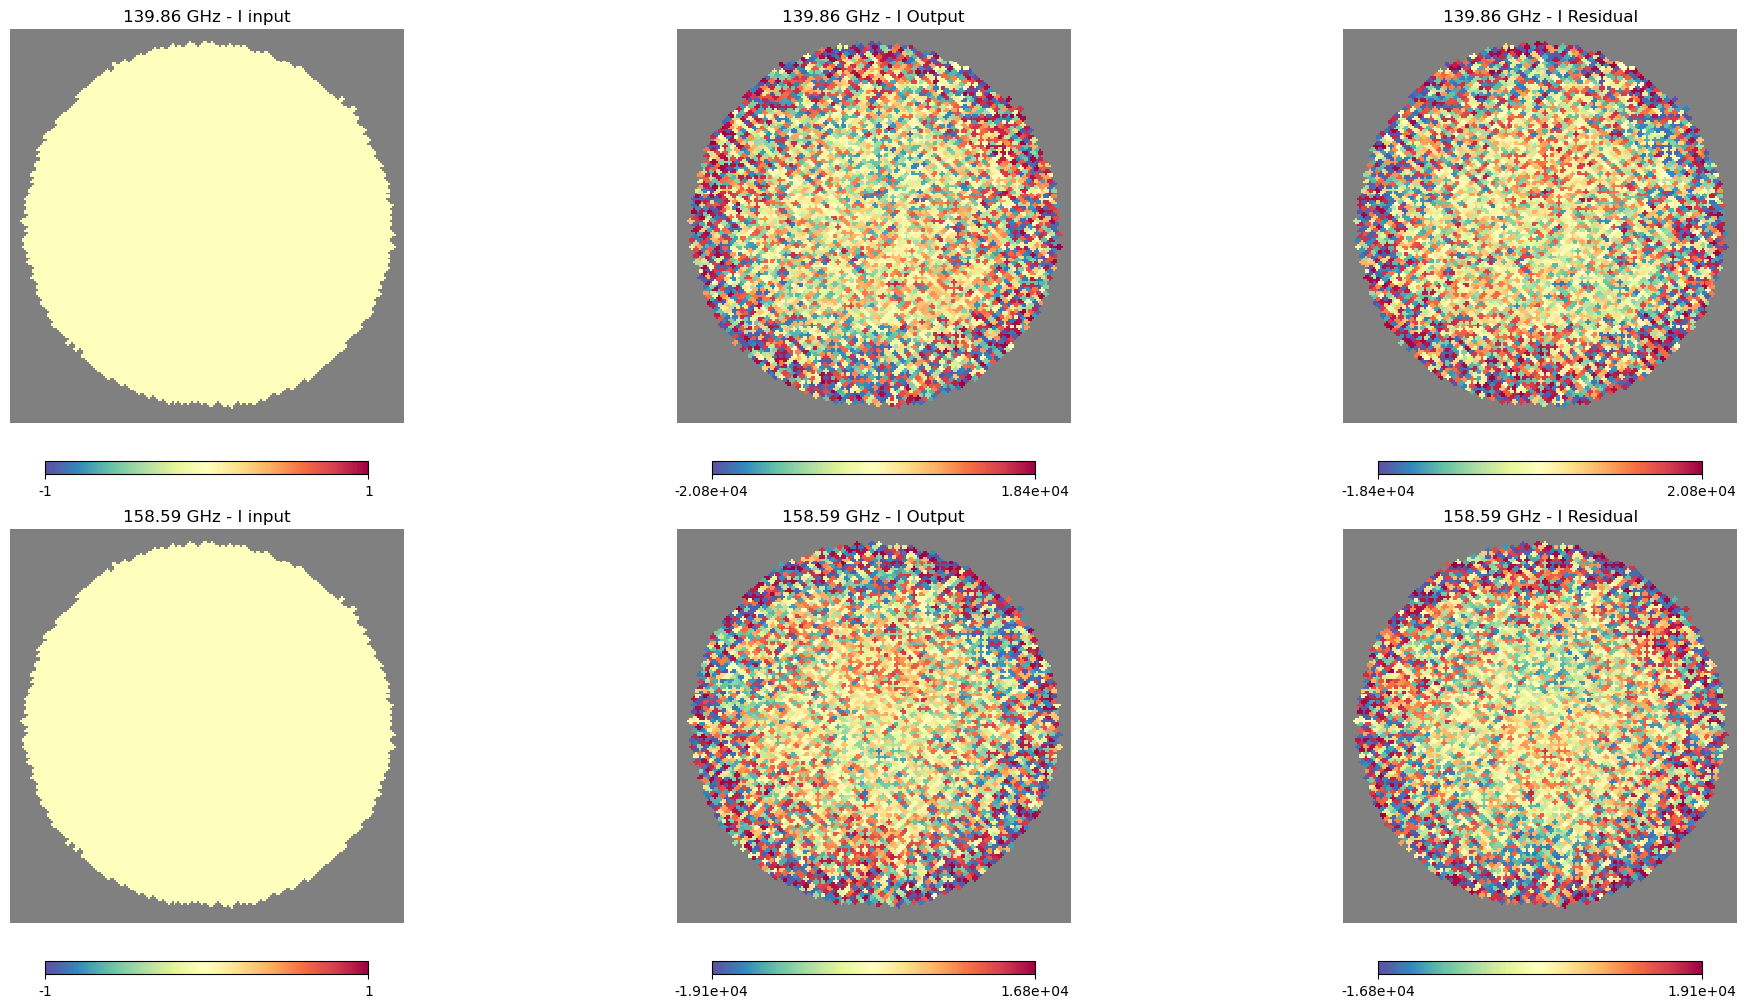

In [34]:
STOKES = ["I", "Q", "U"]

maps_input_noise[:, ~seenpix, :] = hp.UNSEEN
maps_rec_noise[:, ~seenpix, :] = hp.UNSEEN
maps_res_noise[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2
# sigma_input = np.std(maps_input[:, seenpix, istk], axis=0)
# sigma_rec = np.std(maps_rec[:, seenpix, istk], axis=0)
# sigma_res = np.std(maps_rec[:, seenpix, istk] - maps_input[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="Spectral_r",
                        #norm="hist",
                        # min = - n * sigma_input[inu],
                        # max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="Spectral_r",
                        norm="hist",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res_noise[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="Spectral_r",
                        norm="hist",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

Text(0.5, 1.0, '$N_{rec} = 1,\\quad \\sigma_n=$3.49e+03')

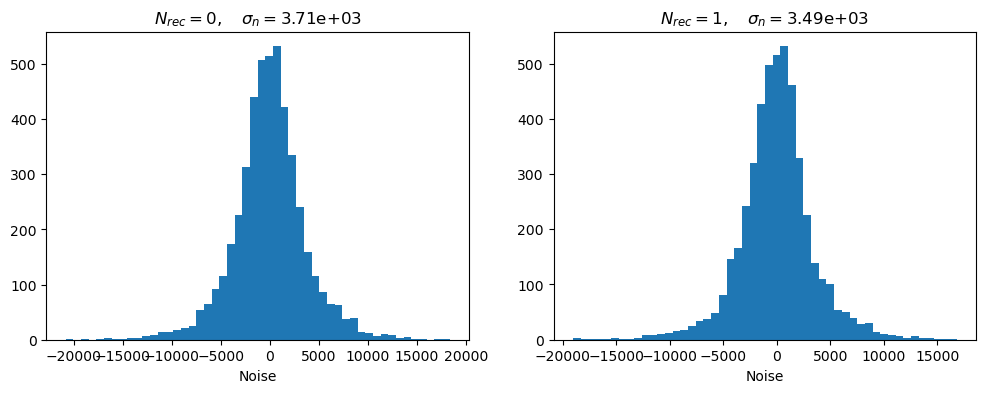

In [35]:
mask01 = maps_rec_noise[0,:,0] > -3e4 
mask02 = maps_rec_noise[0,:,0] < 3e4
mask0 = mask01*mask02

noise_std0 = np.std(maps_rec_noise[0,:,0][mask0])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(maps_rec_noise[0,:,0][mask0], bins=50)
plt.xlabel('Noise')
plt.title(r'$N_{rec} = 0,\quad \sigma_n=$'+f'{noise_std0:.2e}')

mask11 = maps_rec_noise[1,:,0] > -3e4 
mask12 = maps_rec_noise[1,:,0] < 3e4
mask1 = mask11*mask12

noise_std1 = np.std(maps_rec_noise[1,:,0][mask1])

plt.subplot(1,2,2)
plt.hist(maps_rec_noise[1,:,0][mask1], bins=50)
plt.xlabel('Noise')
plt.title(r'$N_{rec} = 1,\quad \sigma_n=$'+f'{noise_std1:.2e}')

### Montecarlo simulation for noise

In [36]:
datas = []
for i in range(1,10):
    datas.append(pickle.load(open(f"/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/noise{i}_None.pkl", "rb")))

In [37]:
maps_rec_noise = []

for data in datas:
    nus = data["nus"]
    Nrec = nus.shape[0] - 7

    maps_rec_noise.append(data["maps"][:Nrec])

maps_rec_noise = np.array(maps_rec_noise)

noise_std = np.std(maps_rec_noise, axis=0)

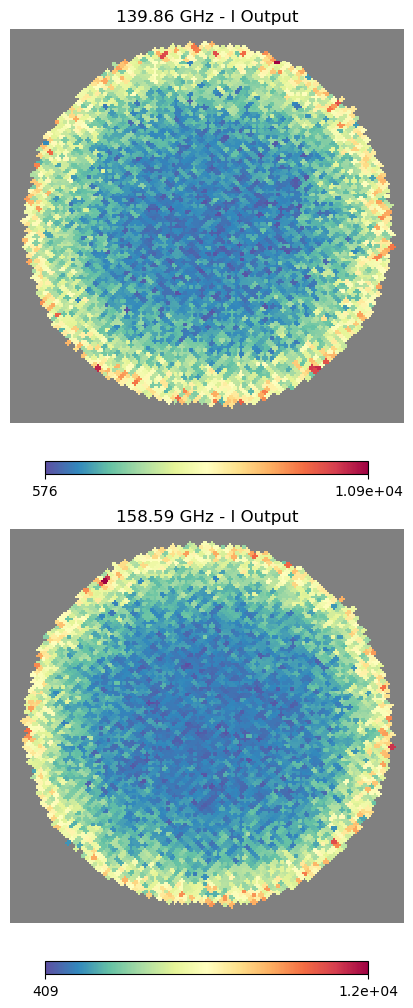

In [38]:
STOKES = ["I", "Q", "U"]

noise_std[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((noise_std[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="Spectral_r",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    k += 3

2602.1147537426264

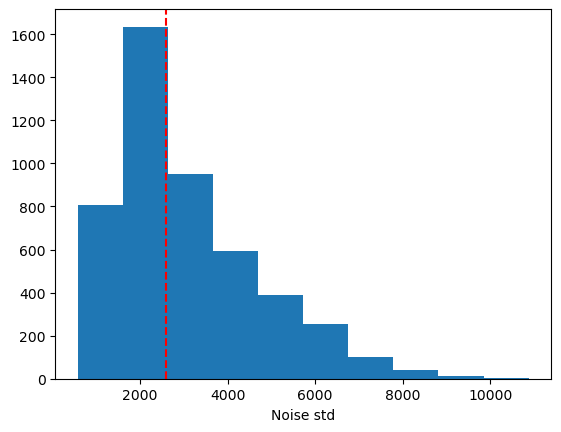

In [39]:
mask1 = noise_std[0,:,0] > -3e4 
mask2 = noise_std[0,:,0] < 3e4
mask = mask1*mask2

median_noise_std = np.median(noise_std[0,:,0][mask])

plt.hist(noise_std[0,:,0][mask])
plt.axvline(median_noise_std, ls='--', c='r')
plt.xlabel('Noise std')

median_noise_std

### Signal-noise ratio

In [40]:
snr = np.abs(maps_rec_sky / noise_std)

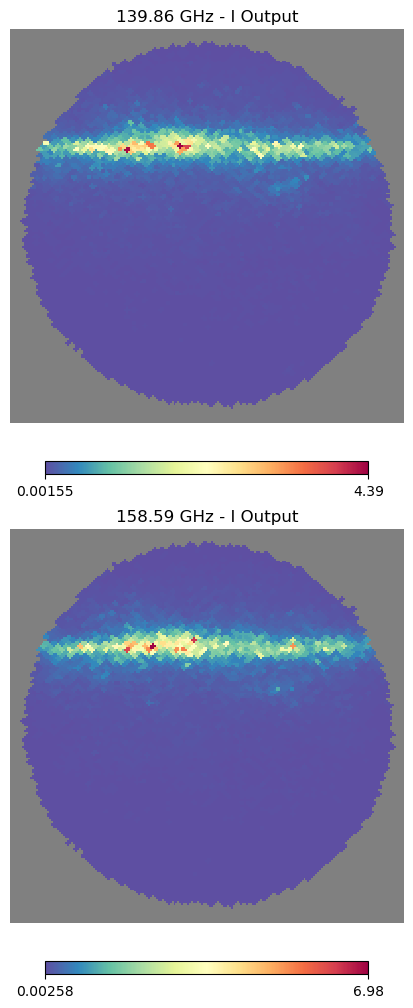

In [41]:
STOKES = ["I", "Q", "U"]

snr[:, ~seenpix, :] = hp.UNSEEN


istk = 0
n = 2

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview(snr[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="Spectral_r",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    k += 3

<Figure size 2000x1000 with 0 Axes>

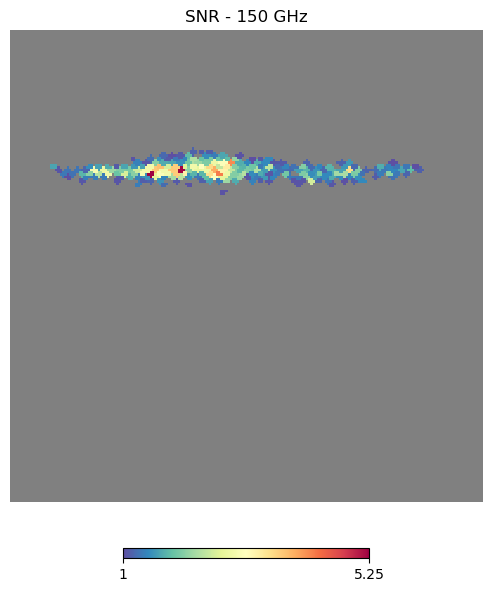

In [44]:
snr_mean = (snr[0, :, 0] + snr[1, :, 0])/2
snr_mean[snr_mean<=1] = hp.UNSEEN
plt.figure(figsize=(20, 10))
hp.gnomview(snr_mean, rot=center,
                        reso=reso,
                        notext=True,
                        title=f"SNR - 150 GHz",
                        cmap="Spectral_r")